## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  44.623632   876.336966  0.580616  1.782366  1.523014
1  11.777154  1524.270814  0.306584  6.584105  1.265249
2  51.482537   750.657330  0.117178  3.710027  1.026890
3  60.331959   322.896422  0.782808  8.060478  1.315926
4  61.809941  1030.590557  0.288230  3.300948  1.444001


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0501973	total: 67.1ms	remaining: 1m 7s
1:	learn: 1.0423048	total: 67.7ms	remaining: 33.8s
2:	learn: 1.0314456	total: 68.4ms	remaining: 22.7s
3:	learn: 1.0199165	total: 68.9ms	remaining: 17.1s
4:	learn: 1.0081221	total: 69.4ms	remaining: 13.8s
5:	learn: 0.9975747	total: 70ms	remaining: 11.6s
6:	learn: 0.9867138	total: 70.5ms	remaining: 10s
7:	learn: 0.9758755	total: 71ms	remaining: 8.8s
8:	learn: 0.9671329	total: 71.5ms	remaining: 7.87s
9:	learn: 0.9561741	total: 72ms	remaining: 7.13s
10:	learn: 0.9449566	total: 72.5ms	remaining: 6.52s
11:	learn: 0.9348439	total: 73ms	remaining: 6.01s
12:	learn: 0.9238208	total: 73.5ms	remaining: 5.58s
13:	learn: 0.9137612	total: 73.9ms	remaining: 5.2s
14:	learn: 0.9041499	total: 74.3ms	remaining: 4.88s
15:	learn: 0.8960166	total: 74.7ms	remaining: 4.59s
16:	learn: 0.8868983	total: 75.2ms	remaining: 4.35s
17:	learn: 0.8777484	total: 75.6ms	remaining: 4.12s
18:	learn: 0.8700211	total: 76ms	remaining: 3.92s
19:	le

122:	learn: 0.3747957	total: 119ms	remaining: 847ms
123:	learn: 0.3723105	total: 119ms	remaining: 844ms
124:	learn: 0.3698047	total: 120ms	remaining: 839ms
125:	learn: 0.3676538	total: 120ms	remaining: 835ms
126:	learn: 0.3660712	total: 121ms	remaining: 831ms
127:	learn: 0.3643042	total: 121ms	remaining: 826ms
128:	learn: 0.3617620	total: 122ms	remaining: 822ms
129:	learn: 0.3594318	total: 122ms	remaining: 817ms
130:	learn: 0.3577528	total: 122ms	remaining: 810ms
131:	learn: 0.3555526	total: 123ms	remaining: 806ms
132:	learn: 0.3535874	total: 123ms	remaining: 802ms
133:	learn: 0.3519568	total: 124ms	remaining: 799ms
134:	learn: 0.3499400	total: 124ms	remaining: 794ms
135:	learn: 0.3479628	total: 124ms	remaining: 790ms
136:	learn: 0.3460642	total: 125ms	remaining: 785ms
137:	learn: 0.3450996	total: 125ms	remaining: 782ms
138:	learn: 0.3434690	total: 125ms	remaining: 777ms
139:	learn: 0.3418924	total: 126ms	remaining: 774ms
140:	learn: 0.3392664	total: 126ms	remaining: 769ms
141:	learn: 

279:	learn: 0.2012879	total: 186ms	remaining: 479ms
280:	learn: 0.2009605	total: 187ms	remaining: 478ms
281:	learn: 0.2005573	total: 187ms	remaining: 477ms
282:	learn: 0.2001806	total: 188ms	remaining: 476ms
283:	learn: 0.1996443	total: 188ms	remaining: 474ms
284:	learn: 0.1991162	total: 188ms	remaining: 473ms
285:	learn: 0.1986415	total: 189ms	remaining: 471ms
286:	learn: 0.1983021	total: 189ms	remaining: 470ms
287:	learn: 0.1978907	total: 189ms	remaining: 468ms
288:	learn: 0.1974860	total: 190ms	remaining: 467ms
289:	learn: 0.1968522	total: 190ms	remaining: 466ms
290:	learn: 0.1964314	total: 191ms	remaining: 465ms
291:	learn: 0.1961351	total: 191ms	remaining: 464ms
292:	learn: 0.1958366	total: 192ms	remaining: 463ms
293:	learn: 0.1952877	total: 192ms	remaining: 462ms
294:	learn: 0.1949960	total: 193ms	remaining: 461ms
295:	learn: 0.1946942	total: 193ms	remaining: 460ms
296:	learn: 0.1942149	total: 194ms	remaining: 459ms
297:	learn: 0.1938013	total: 194ms	remaining: 458ms
298:	learn: 

540:	learn: 0.1091718	total: 300ms	remaining: 255ms
541:	learn: 0.1091280	total: 301ms	remaining: 254ms
542:	learn: 0.1086299	total: 301ms	remaining: 254ms
543:	learn: 0.1085871	total: 302ms	remaining: 253ms
544:	learn: 0.1085430	total: 302ms	remaining: 252ms
545:	learn: 0.1081047	total: 302ms	remaining: 251ms
546:	learn: 0.1080239	total: 303ms	remaining: 251ms
547:	learn: 0.1079826	total: 303ms	remaining: 250ms
548:	learn: 0.1079401	total: 303ms	remaining: 249ms
549:	learn: 0.1074570	total: 304ms	remaining: 249ms
550:	learn: 0.1073877	total: 304ms	remaining: 248ms
551:	learn: 0.1069629	total: 305ms	remaining: 247ms
552:	learn: 0.1069026	total: 305ms	remaining: 247ms
553:	learn: 0.1068055	total: 305ms	remaining: 246ms
554:	learn: 0.1063348	total: 307ms	remaining: 246ms
555:	learn: 0.1062682	total: 307ms	remaining: 245ms
556:	learn: 0.1058431	total: 307ms	remaining: 244ms
557:	learn: 0.1057979	total: 308ms	remaining: 244ms
558:	learn: 0.1057534	total: 308ms	remaining: 243ms
559:	learn: 

693:	learn: 0.0708880	total: 368ms	remaining: 162ms
694:	learn: 0.0705887	total: 368ms	remaining: 162ms
695:	learn: 0.0704793	total: 369ms	remaining: 161ms
696:	learn: 0.0703292	total: 369ms	remaining: 161ms
697:	learn: 0.0701047	total: 370ms	remaining: 160ms
698:	learn: 0.0697340	total: 370ms	remaining: 159ms
699:	learn: 0.0694812	total: 370ms	remaining: 159ms
700:	learn: 0.0691935	total: 371ms	remaining: 158ms
701:	learn: 0.0689053	total: 371ms	remaining: 158ms
702:	learn: 0.0686251	total: 372ms	remaining: 157ms
703:	learn: 0.0685363	total: 372ms	remaining: 157ms
704:	learn: 0.0682893	total: 373ms	remaining: 156ms
705:	learn: 0.0680159	total: 373ms	remaining: 155ms
706:	learn: 0.0677728	total: 374ms	remaining: 155ms
707:	learn: 0.0675465	total: 374ms	remaining: 154ms
708:	learn: 0.0673248	total: 375ms	remaining: 154ms
709:	learn: 0.0671048	total: 375ms	remaining: 153ms
710:	learn: 0.0668883	total: 376ms	remaining: 153ms
711:	learn: 0.0666760	total: 376ms	remaining: 152ms
712:	learn: 

961:	learn: 0.0362350	total: 482ms	remaining: 19ms
962:	learn: 0.0361021	total: 482ms	remaining: 18.5ms
963:	learn: 0.0360063	total: 483ms	remaining: 18ms
964:	learn: 0.0359600	total: 483ms	remaining: 17.5ms
965:	learn: 0.0358669	total: 484ms	remaining: 17ms
966:	learn: 0.0357695	total: 484ms	remaining: 16.5ms
967:	learn: 0.0356413	total: 484ms	remaining: 16ms
968:	learn: 0.0355727	total: 485ms	remaining: 15.5ms
969:	learn: 0.0354474	total: 485ms	remaining: 15ms
970:	learn: 0.0352653	total: 486ms	remaining: 14.5ms
971:	learn: 0.0351907	total: 486ms	remaining: 14ms
972:	learn: 0.0351233	total: 486ms	remaining: 13.5ms
973:	learn: 0.0350501	total: 487ms	remaining: 13ms
974:	learn: 0.0349169	total: 487ms	remaining: 12.5ms
975:	learn: 0.0348271	total: 487ms	remaining: 12ms
976:	learn: 0.0347552	total: 488ms	remaining: 11.5ms
977:	learn: 0.0346678	total: 488ms	remaining: 11ms
978:	learn: 0.0346020	total: 489ms	remaining: 10.5ms
979:	learn: 0.0344273	total: 489ms	remaining: 9.98ms
980:	learn:

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


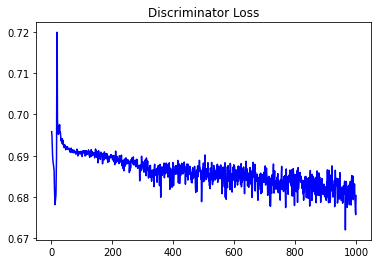

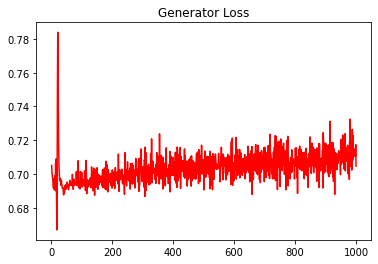

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.28943240149457433


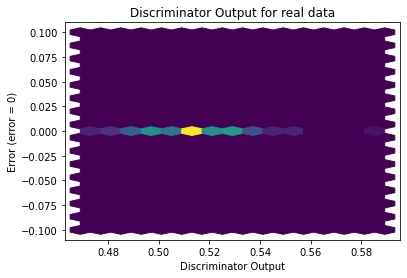

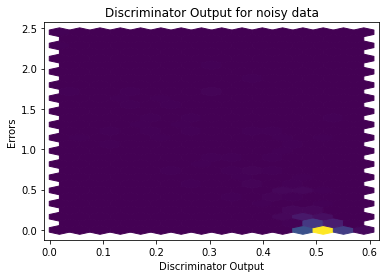

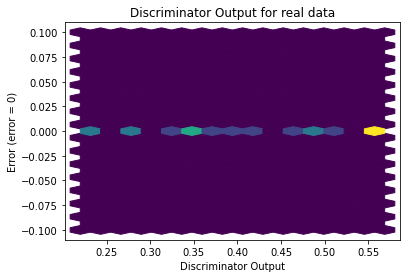

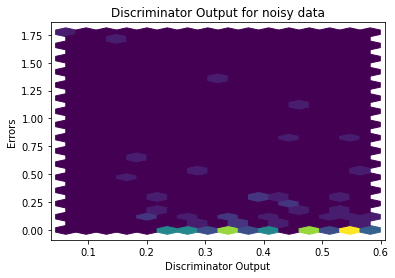

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.8628]], requires_grad=True)
